# Random Numbers, Histograms, and a Simulation

## Introduction

Random numbers are often useful both for simulation of physical processes and for generating a collection of test cases.
Here we will do a mathematical simulation: approximating $\pi$ on the basis that the unit circle occupies a fraction $\pi/4$ of the $2 \times 2$ square enclosing it.

### Disclaimer

Actually, the best we have available is **pseudo-random** numbers, generated by algorithms that actually produce a very long but eventually repeating sequence of numbers.

## Module `random` within package `numpy`

The pseudo-random number generator we use are provided by package Numpy in its module random – full name `numpy.random`.
This module contains numerous random number generators; here we look at just a few.

We introduce the abbreviation "npr" for this, along with the standard abbreviations "np" for `numpy` and "plt" for module `matplotlib.pyplot` witit package `matplotlib

In [1]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Uniformly distributed real numbers: `numpy.random.rand`

First, the function `rand` (full name `numpy.random.rand`) generates uniformly-distributed real numbers in the semi-open interval $[0,1)$.

To generate a single value, use it with no argument:

In [2]:
n_samples = 4
for sample in range(n_samples):
    print(npr.rand())

0.6831120389814106
0.5548018157238266
0.8695626004658878
0.3752686546706374


### Arrays of random values

To generate an array of values all at once, one can specify how many as the first and only input argument:

In [3]:
pseudorandomnumbers = npr.rand(n_samples)
print(pseudorandomnumbers)

[0.62144348 0.03793401 0.13891253 0.84806369]


However, the first method has an advantage in some situations: neither the whole list of integers from 0 to `n_samples - 1` nor the collection of random numbers is stored at any time: instead, just one value at a time is provided, used, and then "forgotten".
This can be beneficial or even essential when a very large number of random values is used; it is not unusual for a simulation to require more random values than the computer's memory can hold.

### Multi-dimensional arrays of random values

 We can also generate multi-dimensional arrays, by giving the lengths of each dimension as arguments:

In [4]:
numbers2d = npr.rand(2,3)
print('A two-dimensional array of random numbers:\n', numbers2d)
numbers3d = npr.rand(2,3,4)
print('\nA three-dimensional array of random numbers:\n', numbers3d)

A two-dimensional array of random numbers:
 [[0.18395217 0.71429007 0.68437103]
 [0.00242336 0.92888447 0.14129646]]

A three-dimensional array of random numbers:
 [[[0.2511712  0.85518662 0.36048736 0.11214513]
  [0.00948166 0.91241279 0.07428897 0.18599767]
  [0.75078587 0.31421873 0.00762302 0.15589679]]

 [[0.78636402 0.48269234 0.08894184 0.33770037]
  [0.66866924 0.85747635 0.82185659 0.83088524]
  [0.98993293 0.10828591 0.78003614 0.53410965]]]


## Normally distributed real numbers: `numpy.random.randn`

The function `randn` has the same interface, but generates numbers with the standard normal distribution of mean zero, standard deviation one:

In [5]:
print('Ten normally distributed values:\n', npr.randn(20))

Ten normally distributed values:
 [ 1.01125557 -0.51308499  1.47690102 -0.1352893   0.03629515  1.06888055
  0.17867389  0.03297391  1.62309016  0.38036881 -1.45193537 -0.16739935
  1.52999647 -0.24956606  0.62335861 -0.23251452  0.4546426  -0.61267693
  1.24106299  0.52917226]


In [6]:
n_samples = 10**7
normf_samples = npr.randn(n_samples)
mean = sum(normf_samples)/n_samples
print('The mean of these', n_samples, 'samples is', mean)
standard_deviation = np.sqrt(sum(normf_samples**2)/n_samples - mean**2)
print('and their standard deviation is', standard_deviation)

The mean of these 10000000 samples is 0.00032428885458364956
and their standard deviation is 1.0002386370861691


**Note** The exact mean and standard deviation of the standard normal distribtion are 0 and 1 respectively,
so the slight variations above are due to these being only a sample mean and sample standard deviation.

## Histogram plots with `matplotlib.random.hist`

`matplotlib.random` has a function `hist(x, bins, ...)` for plotting histograms, so we can check what this normal distribution actually looks like.

Input parameter `x` is the list of values, and when input parameter `bins` is given an integer value, the data is binned into that many equally wide intervals.

The function `hist` also returns three values:
- `n`, the number of values in each bin (the bar heights on the histogram)
- `bins` (which I prefer to call `bin_edges`), the list of values of the edges between the bins
- `patches`, which we can ignore!

It is best to assigned this output to variables; otherwise the numerous values are sprayed over the screen.

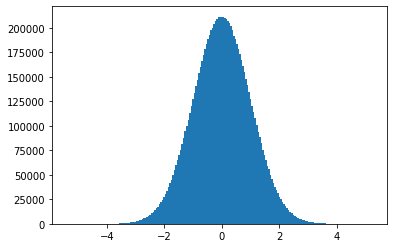

In [7]:
# Note: the three output values must be assigned to variables, even though we do not need them here.
(n, bin_edges, patches) = plt.hist(normf_samples, 200)

## Random integers: `numpy.random.randint`

One can generate pseudo-random integers, uniformly distributed between specified lower and upper values.

In [8]:
n_dice = 60
dice_rolls = npr.randint(1, 6+1, n_dice)
print(n_dice, 'random dice rolls:\n', dice_rolls)
# Count each outcome: this needs a list instead of an array:
dice_rolls_list = list(dice_rolls)
for value in (1, 2, 3, 4, 5, 6):
    count = dice_rolls_list.count(value)
    print(value, 'occured', count, 'times')

60 random dice rolls:
 [4 3 2 3 3 3 3 4 1 6 5 4 4 6 6 3 2 6 5 2 5 4 3 1 4 4 1 1 2 2 3 4 3 4 1 6 1
 3 6 6 6 5 6 6 2 5 6 4 1 3 2 5 4 5 2 3 6 3 3 5]
1 occured 7 times
2 occured 8 times
3 occured 14 times
4 occured 11 times
5 occured 8 times
6 occured 12 times


### Specifying bin edges for the histogram

This time, it is best to explicitly specify a list of the edges of the bins, by making the second argument `bins` a list.

With six values, seven edges are needed, and it looks nicest if they are centered on the integers.

In [9]:
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

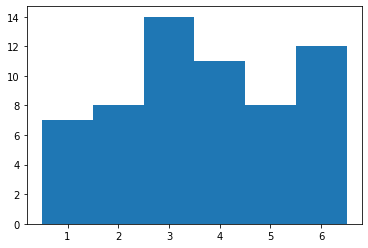

In [10]:
(n, bin_edges, patches) = plt.hist(dice_rolls, bin_edges)

Run the above several times, redrawing the histogram each time; you should see a lot of variation.

Things average out with more rolls:

1 occured a fraction 0.166567 of the time
2 occured a fraction 0.166454 of the time
3 occured a fraction 0.166568 of the time
4 occured a fraction 0.16633 of the time
5 occured a fraction 0.167526 of the time
6 occured a fraction 0.166555 of the time


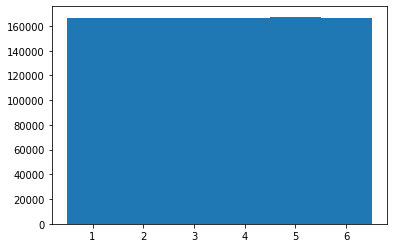

In [11]:
n_dice = 10**6
dice_rolls = npr.randint(1, 6+1, n_dice)
# Count each outcome: this needs a list instead of an array:
dice_rolls_list = list(dice_rolls)
for value in (1, 2, 3, 4, 5, 6):
    count = dice_rolls_list.count(value)
    print(value, 'occured a fraction', count/n_dice, 'of the time')
(n, bin_edges, patches) = plt.hist(dice_rolls, bins = bin_edges)

The histogram is now visually boring, but mathematically more satisfying.

<a name="Exercise-A"></a>
#### Exercise A: approximating $\pi$

We can compute approximations of $\pi$ by using the fact that the unit circle occupies a fraction $\pi/4$ of the circumscribed square:

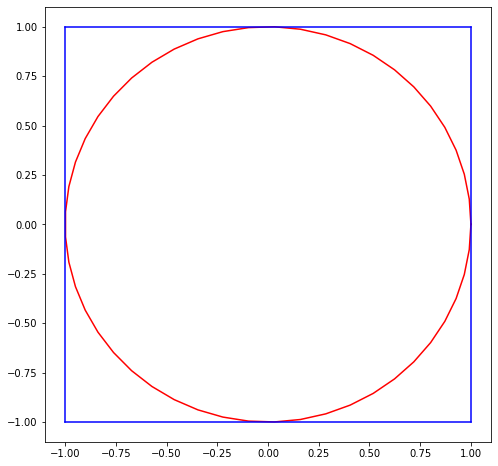

In [12]:
plt.figure(figsize=[8, 8])
angle = np.linspace(0, 2*np.pi)
# Red circle 
plt.plot(np.cos(angle), np.sin(angle), 'r')
# Blue square
plt.plot([-1,1], [-1,-1], 'b')  # bottom side of square
plt.plot([1,1], [-1,1], 'b')  # right side  of square
plt.plot([1,-1], [1,1], 'b')  # top side of square
plt.plot([-1,-1], [1,-1], 'b')  # left side of square

We can use this fact as follows:
- generate a list of $N$ random points in the square $[-1,1] \times [-1,1]$ that circumscribes the unit circle,
by generating successive unifromly distributed random values for both the $x$ and $y$ coordinates.
- compute the fraction of these that are inside the unit circle, which should be approximately $\pi/4$.
($N$ needs to be fairly large; you could try $N=100$ initially, but will increase it later.)
- Multiply by four and there you are!

Do multiple trials with the same number $N$ of samples, to see the variation as an indication of accuracy.

Collect the various approximations of $\pi$ in a list, compute the (sample) mean and (sample) standard deviation of the list, and illustrate with a histogram.

<a name="Exercise-B"></a>
#### Exercise B

It takes a lot of samples to get decent accuracy, so after part (a) is working,
experiment with successively more samples;
increase the number $N$ of samples per trial by big steps, like factors of 100.

For each choice of sample size $N$, compute the mean and standard deviation, and plot the histogram.